
Dataset Preview:
         Date     Product  Quantity  Price Customer_ID Region  Total_Sales
0  2024-01-01       Phone         7  37300     CUST001   East       261100
1  2024-01-02  Headphones         4  15406     CUST002  North        61624
2  2024-01-03       Phone         2  21746     CUST003   West        43492
3  2024-01-04  Headphones         1  30895     CUST004   East        30895
4  2024-01-05      Laptop         8  39835     CUST005  North       318680

===== DESCRIPTIVE STATISTICS =====
Mean Total_Sales: 123650.48
Median Total_Sales: 97955.5
Mode Total_Sales: 6540
Standard Deviation: 100161.08527499213

===== DISTRIBUTION ANALYSIS =====


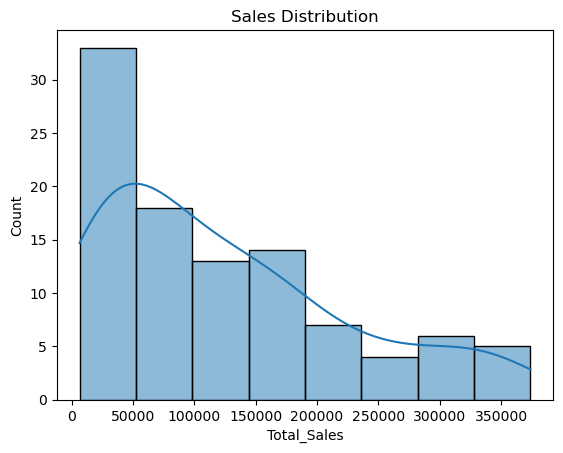

Shapiro Test p-value: 1.2590767205714734e-06
Sales data is NOT normally distributed

===== CORRELATION ANALYSIS =====
             Quantity     Price  Total_Sales
Quantity     1.000000  0.008014     0.688107
Price        0.008014  1.000000     0.646131
Total_Sales  0.688107  0.646131     1.000000


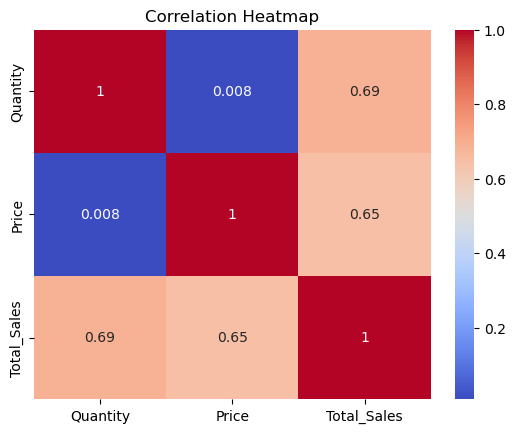


===== HYPOTHESIS TESTING =====
One Sample T-Test p-value: 4.2116827140991076e-13
Independent T-Test p-value: 0.7226811638407535
ANOVA p-value: 0.09723678084980039

===== CONFIDENCE INTERVAL =====
95% Confidence Interval: (103776.34767158539, 143524.6123284146)
Margin of Error: 19874.132328414606

===== REGRESSION ANALYSIS =====

===== STATISTICAL ANALYSIS REPORT =====
Average Sales: 123650.48 ± 19874.13 (95% CI)

Analysis Completed Successfully.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# 1. Load Dataset

df = pd.read_csv("sales_data.csv")

print("\nDataset Preview:")
print(df.head())


# 2. Descriptive Statistics

print("\n===== DESCRIPTIVE STATISTICS =====")

mean_sales = df['Total_Sales'].mean()
median_sales = df['Total_Sales'].median()
mode_sales = df['Total_Sales'].mode()[0]
std_sales = df['Total_Sales'].std()

print("Mean Total_Sales:", mean_sales)
print("Median Total_Sales:", median_sales)
print("Mode Total_Sales:", mode_sales)
print("Standard Deviation:", std_sales)


# 3. Distribution Analysis

print("\n===== DISTRIBUTION ANALYSIS =====")

plt.figure()
sns.histplot(df['Total_Sales'], kde=True)
plt.title("Sales Distribution")
plt.show()

# Normality Test
shapiro_stat, shapiro_p = stats.shapiro(df['Total_Sales'])
print("Shapiro Test p-value:", shapiro_p)

if shapiro_p > 0.05:
    print("Sales data is normally distributed")
else:
    print("Sales data is NOT normally distributed")


# 4. Correlation Analysis

print("\n===== CORRELATION ANALYSIS =====")

correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

if 'Marketing_Spend' in df.columns:
    corr = df['Total_Sales'].corr(df['Marketing_Spend'])
    print("Sales vs Marketing Correlation:", corr)


# 5. Hypothesis Testing (3 Tests)

print("\n===== HYPOTHESIS TESTING =====")

# 1️⃣ One Sample T-Test (Test if mean sales = 40000)
t_stat1, p_val1 = stats.ttest_1samp(df['Total_Sales'], 40000)
print("One Sample T-Test p-value:", p_val1)

# 2️⃣ Independent T-Test (If Region column exists)
if 'Region' in df.columns:
    regions = df['Region'].unique()
    if len(regions) >= 2:
        group1 = df[df['Region'] == regions[0]]['Total_Sales']
        group2 = df[df['Region'] == regions[1]]['Total_Sales']
        t_stat2, p_val2 = stats.ttest_ind(group1, group2)
        print("Independent T-Test p-value:", p_val2)

# 3️⃣ ANOVA (If multiple regions exist)
if 'Region' in df.columns and len(df['Region'].unique()) >= 3:
    groups = [df[df['Region'] == r]['Total_Sales'] for r in df['Region'].unique()]
    f_stat, p_val3 = stats.f_oneway(*groups)
    print("ANOVA p-value:", p_val3)


# 6. Confidence Interval (95%)

print("\n===== CONFIDENCE INTERVAL =====")

confidence = 0.95
n = len(df['Total_Sales'])
mean = np.mean(df['Total_Sales'])
std_err = stats.sem(df['Total_Sales'])
margin = std_err * stats.t.ppf((1 + confidence) / 2., n-1)

lower = mean - margin
upper = mean + margin

print(f"95% Confidence Interval: ({lower}, {upper})")
print("Margin of Error:", margin)


# 7. Regression Analysis

print("\n===== REGRESSION ANALYSIS =====")

if 'Marketing_Spend' in df.columns:
    X = df['Marketing_Spend']
    y = df['Total_Sales']
    
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    
    print(model.summary())


# 8. Final Business Summary

print("\n===== STATISTICAL ANALYSIS REPORT =====")

print(f"Average Sales: {round(mean_sales,2)} ± {round(margin,2)} (95% CI)")

if 'Marketing_Spend' in df.columns:
    print(f"Correlation (Sales-Marketing): {round(corr,2)}")

if 'Marketing_Spend' in df.columns:
    print("Marketing significantly impacts sales (Check regression p-value above)")

print("\nAnalysis Completed Successfully.")